In [27]:
# Importing essential libraries for data cleaning and analysis
import pandas as pd
import numpy as np

# Loading the NYC Airbnb dataset
df = pd.read_csv("E:/DA Practice/oasis infobyte/archive/AB_NYC_2019.csv")

# Previewing the first few rows to understand the dataset
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [28]:
# Checking shape of the dataset (rows, columns)
print("Dataset Shape:", df.shape)

# Checking missing values column-wise
print("\nMissing Values:\n")
print(df.isnull().sum())

# Checking how many duplicate rows exist
print("\nDuplicate Rows:", df.duplicated().sum())


Dataset Shape: (48895, 16)

Missing Values:

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Duplicate Rows: 0


In [29]:
# Separating numeric and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Filling missing numeric values using median (robust against outliers)
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Filling missing categorical values using mode (most common value)
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("Missing values have been filled successfully.")


Missing values have been filled successfully.


In [30]:
# Counting duplicates before removal
before = df.shape[0]

# Removing duplicates
df = df.drop_duplicates()

after = df.shape[0]

print(f"Duplicates removed: {before - after}")


Duplicates removed: 0


In [31]:
# Converting column names to lowercase and replacing spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")

print("Column names standardized.")
df.head()


Column names standardized.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [32]:
# Creating a function to cap outliers using Interquartile Range (IQR)
def cap_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Capping values outside IQR boundaries
    df[column] = np.clip(df[column], lower_limit, upper_limit)

# Applying outlier treatment on numeric columns
for col in num_cols:
    cap_outliers(col)

print("Outliers have been capped using the IQR method.")


Outliers have been capped using the IQR method.


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a clean plot style
sns.set(style="whitegrid")


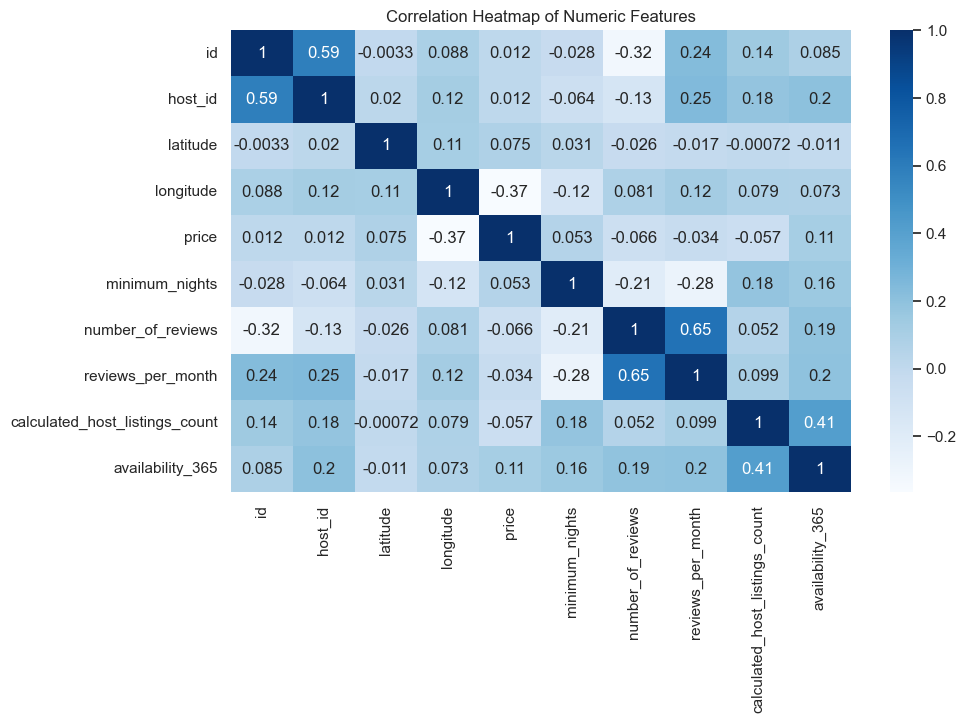

In [38]:
# Selecting numeric data for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


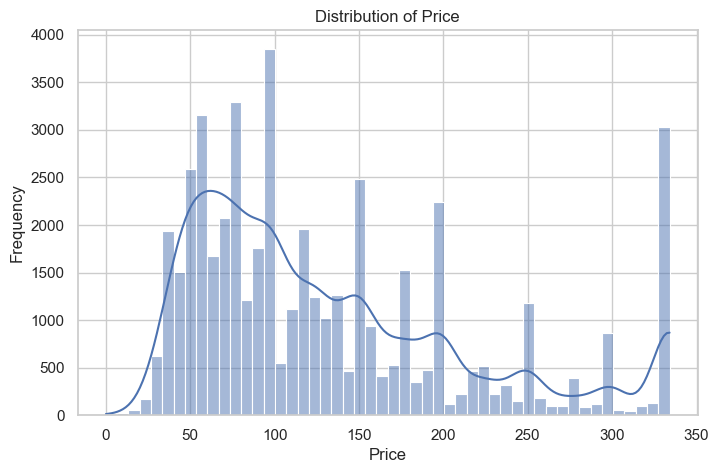

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


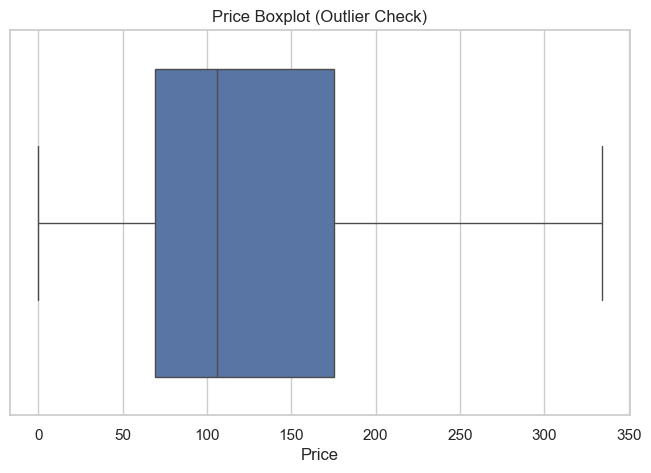

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title("Price Boxplot (Outlier Check)")
plt.xlabel("Price")
plt.show()


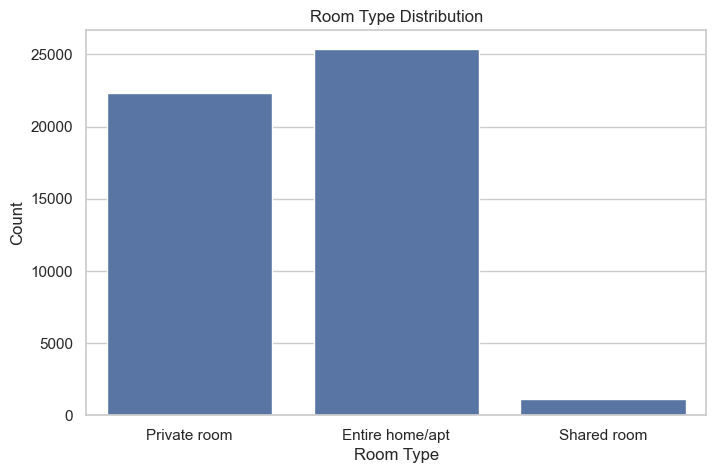

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['room_type'])
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()
